#theory question

1. What is unsupervised learning in the context of machine learning?

=Unsupervised learning is a type of machine learning where the model learns patterns and structures from unlabeled data without predefined output. Clustering and dimensionality reduction are common examples.

2. How does K-Means clustering algorithm work?

=Choose the number of clusters k.

Randomly initialize cluster centroids.

Assign each point to the nearest centroid.

Update centroids as the mean of assigned points.

Repeat assignment and update until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.

=A dendrogram is a tree-like diagram that shows the sequence of merges or splits in hierarchical clustering, helping visualize how clusters are formed at different distances.

4. What is the main difference between K–Means and Hierarchical Clustering?

=K-Means: Requires specifying k, partitions data, efficient for large datasets.

Hierarchical: No need to predefine k, builds a hierarchy of clusters, but more computationally expensive.

5. What are the advantages of DBSCAN over K-Means?

=Can detect clusters of arbitrary shape.

Handles noise/outliers well.

Does not require the number of clusters as input.

6. When would you use Silhouette Score in clustering?

=When evaluating clustering quality — it measures how similar an object is to its own cluster compared to others (range: -1 to 1).

7. What are the limitations of Hierarchical Clustering?

=Computationally expensive for large datasets.

Sensitive to noise and outliers.

Once merged/split, clusters cannot be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?

=Because clustering relies on distance metrics (e.g., Euclidean distance). Features with larger scales can dominate distance calculations if not normalized.

9. How does DBSCAN identify noise points?

=Points that do not belong to any dense region (i.e., not within eps of enough neighbors) are marked as noise.

10. Define inertia in the context of K-Means.

=Inertia is the sum of squared distances of each point to its nearest centroid, measuring cluster compactness (lower is better).

11. What is the elbow method in K-Means clustering?

=A technique to determine the optimal k by plotting inertia vs. number of clusters and finding the “elbow” point where improvement slows.

12. Describe the concept of "density" in DBSCAN.

=Density refers to the number of points within a given radius (eps). Core points must have at least minPts neighbors within eps.

13. Can hierarchical clustering be used on categorical data?

=Yes, but requires an appropriate distance metric (e.g., Hamming, Jaccard) instead of Euclidean distance.

14. What does a negative Silhouette Score indicate?

=It means the point is likely assigned to the wrong cluster since it’s closer to another cluster than its own.

15. Explain the term "linkage criteria" in hierarchical clustering.

=It determines how distances between clusters are calculated:

Single linkage: min distance between clusters.

Complete linkage: max distance.

Average linkage: average distance.

Ward’s method: minimizes variance.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

=Because it assumes clusters are spherical and equally sized. It struggles with non-globular, uneven, or overlapping clusters.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

=eps: maximum radius of neighborhood.

minPts: minimum points to form a dense region.
Small eps/large minPts → many noise points. Large eps/small minPts → fewer, larger clusters.

18. How does K-Means++ improve upon standard K-Means initialization?

=It initializes centroids more strategically by spreading them out, reducing the chances of poor clustering and speeding up convergence

19. What is agglomerative clustering?

=A type of hierarchical clustering where each point starts as its own cluster, and pairs of clusters are merged iteratively until all are in one cluster.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

=Inertia only measures compactness (within-cluster distance).

Silhouette Score considers both compactness and separation between clusters, giving a more balanced evaluation.

#practical question

1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using scatter plot

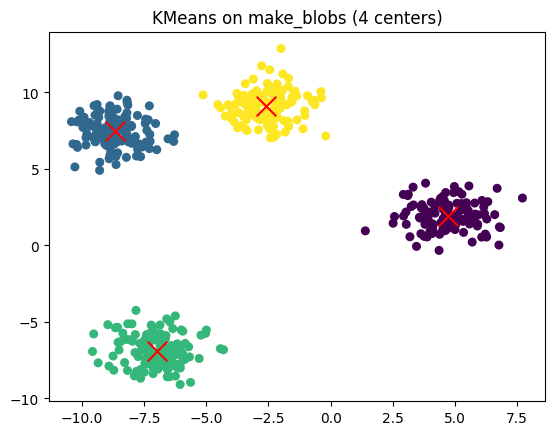

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.0)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title("KMeans on make_blobs (4 centers)")
plt.show()


2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display first 10 predicted labels

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3).fit(X)

print("First 10 predicted labels (Iris):", agg.labels_[:10])


First 10 predicted labels (Iris): [1 1 1 1 1 1 1 1 1 1]


3. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers

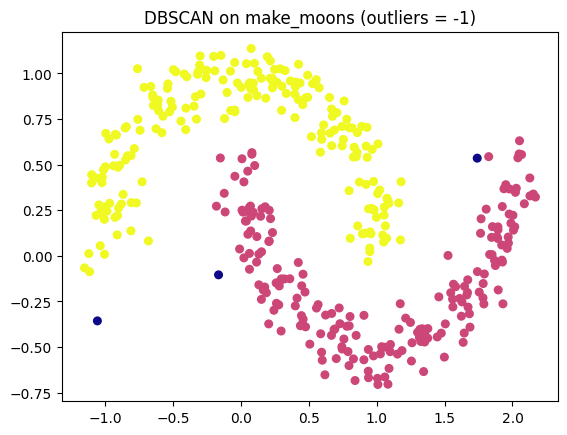

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=400, noise=0.1, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma", s=30)
plt.title("DBSCAN on make_moons (outliers = -1)")
plt.show()


4. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print size of each cluster

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes (Wine):", dict(zip(unique, counts)))


NameError: name 'np' is not defined

5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

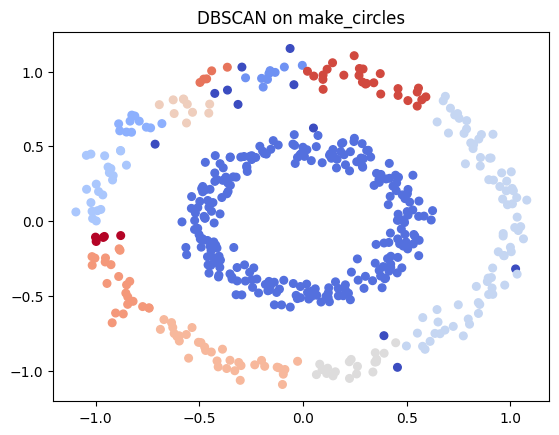

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
db = DBSCAN(eps=0.1, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="coolwarm", s=30)
plt.title("DBSCAN on make_circles")
plt.show()


6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output cluster centroids

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

bc = load_breast_cancer()
X = MinMaxScaler().fit_transform(bc.data)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


7. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

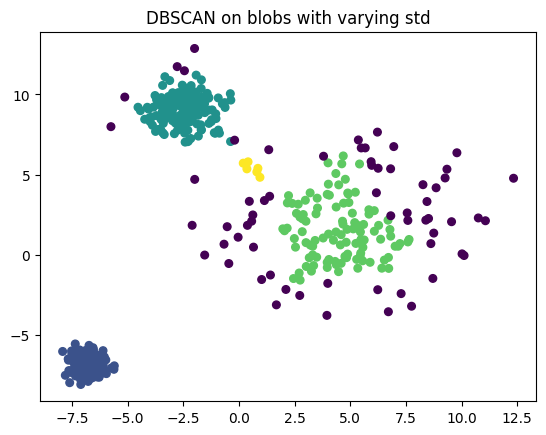

In [9]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
db = DBSCAN(eps=0.8, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="viridis", s=30)
plt.title("DBSCAN on blobs with varying std")
plt.show()


8. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

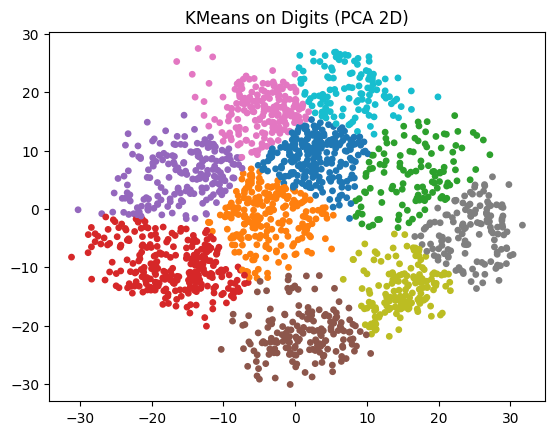

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="tab10", s=15)
plt.title("KMeans on Digits (PCA 2D)")
plt.show()


9. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

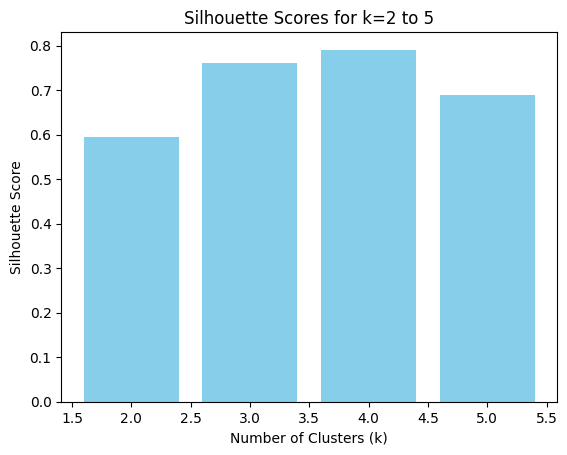

In [11]:
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.bar(range(2, 6), scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2 to 5")
plt.show()


10. Load the Iris dataset and use hierarchical clustering. Plot dendrogram with average linkage

In [12]:
Z = linkage(iris.data, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Iris, average linkage)")
plt.show()


NameError: name 'linkage' is not defined

11. Generate synthetic overlapping clusters with make_blobs, apply K-Means, and visualize decision boundaries

In [13]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Decision boundaries
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x', s=200)
plt.title("KMeans with decision boundaries")
plt.show()


NameError: name 'np' is not defined

12. Load the Digits dataset, apply DBSCAN after reducing dimensions with t-SNE. Visualize results

In [14]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
db = DBSCAN(eps=3, min_samples=5).fit(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db.labels_, cmap="tab20", s=15)
plt.title("DBSCAN on Digits (t-SNE reduced)")
plt.show()


NameError: name 'TSNE' is not defined

13. Generate synthetic data with make_blobs and apply Agglomerative Clustering (complete linkage). Plot

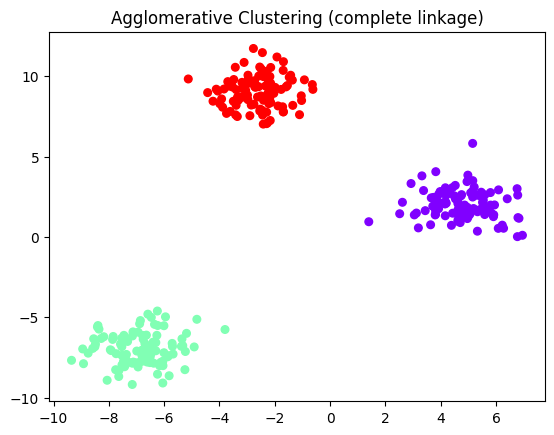

In [15]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap="rainbow", s=30)
plt.title("Agglomerative Clustering (complete linkage)")
plt.show()


14. Load Breast Cancer dataset and compare inertia values for K = 2 to 6 using KMeans (line plot)

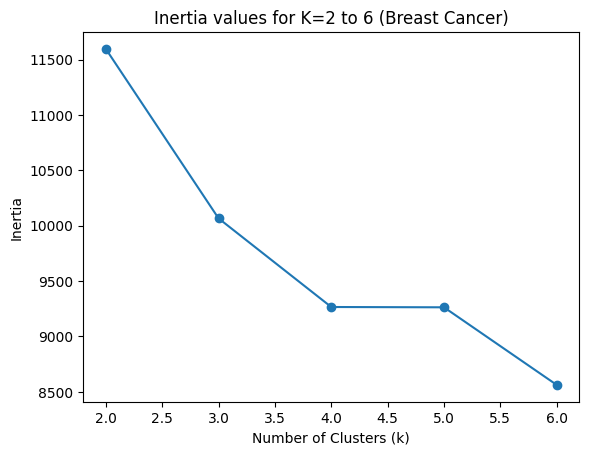

In [16]:
X = StandardScaler().fit_transform(bc.data)
inertias = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Inertia values for K=2 to 6 (Breast Cancer)")
plt.show()


15. Generate synthetic concentric circles with make_circles and cluster using Agglomerative Clustering (single linkage)

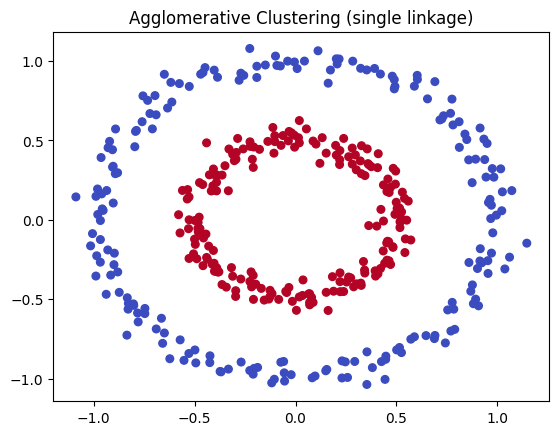

In [17]:
X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage="single").fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap="coolwarm", s=30)
plt.title("Agglomerative Clustering (single linkage)")
plt.show()


16. Use Wine dataset, apply DBSCAN after scaling, and count number of clusters (excluding noise)

X = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=1.5, min_samples=5).fit(X)

n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters (excluding noise):", n_clusters)


17. Generate synthetic data with make_blobs and apply KMeans. Plot cluster centers

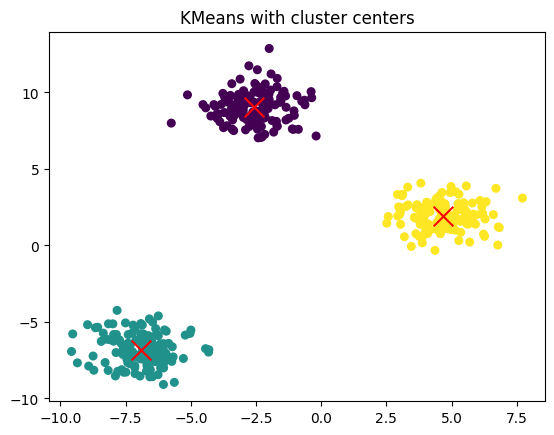

In [18]:
X, y = make_blobs(n_samples=400, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title("KMeans with cluster centers")
plt.show()


18. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [19]:
db = DBSCAN(eps=0.6, min_samples=5).fit(iris.data)
n_noise = list(db.labels_).count(-1)
print("Number of noise points in Iris dataset:", n_noise)


Number of noise points in Iris dataset: 9


19. Generate synthetic non-linearly separable data using make_moons, apply KMeans, and visualize clustering

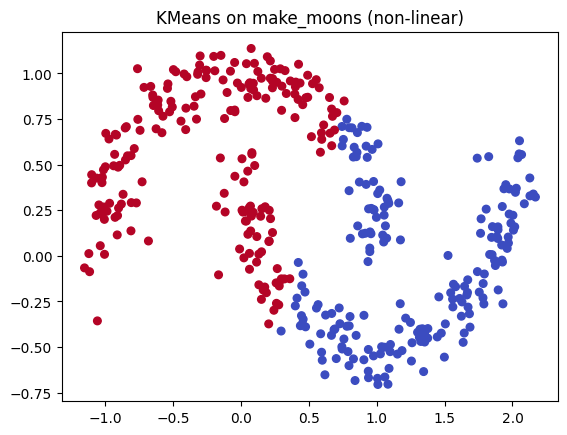

In [20]:
X, y = make_moons(n_samples=400, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="coolwarm", s=30)
plt.title("KMeans on make_moons (non-linear)")
plt.show()


20. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize in 3D

In [2]:
from mpl_toolkits.mplot3d import Axes3D

X_pca = PCA(n_components=3).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap="tab10", s=15)
plt.title("KMeans on Digits (PCA 3D)")
plt.show()


NameError: name 'PCA' is not defined